# Chapter 10. 데이터 집계와 그룹 연산
- 판다스는 데이터셋을 자유롭게 나누고 요약하는 groupby 제공
- SQL과 관계형 데이터베이스는 데이터를 쉽게 합치고 걸러내고 변형하고 집계할 수 있음
- SQL 같은 쿼리문은 그룹 연산에 제약이 있으나, 파이썬과 판다스를 이용하면 각 그룹에 연관된 데이터를 조작하는 파이썬 함수를 조합해 해결 가능

In [71]:
import pandas as pd
import numpy as np

In [72]:
# 저자 깃허브 주소
path_ex = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/examples/'
path_da = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/'

In [73]:
# 구글 드라이브 주소(examples)
path_gg_ex = '/content/drive/MyDrive/Colab Notebooks/연희전문학원/Python for DA/examples/'

## 10.1 그룹 연산에 대한 고찰
- 그룹 연산 순서: 데이터 분리 > 분리된 그룹에 함수 적용하여 새로운 값 획득 > 함수가 적용된 결과를 하나의 객체로 결합
- 그룹 연산의 첫 번째 단계: 판다스 객체(Series, DataFrame)나 다른 객체에 들어 있는 데이터를 하나의 이상의 키 기준으로 분리
> 객체는 하나의 축을 기준으로 분리 (예: DataFrame 행(index) 또는 열(columns))
- 분리 후에는 함수를 각 그룹에 적용시켜 새로운 값 획득
- 함수를 적용한 결과를 하나의 객체로 결합
> 결과를 담는 객체는 데이터에 어떤 연산을 했는지에 따라 결정

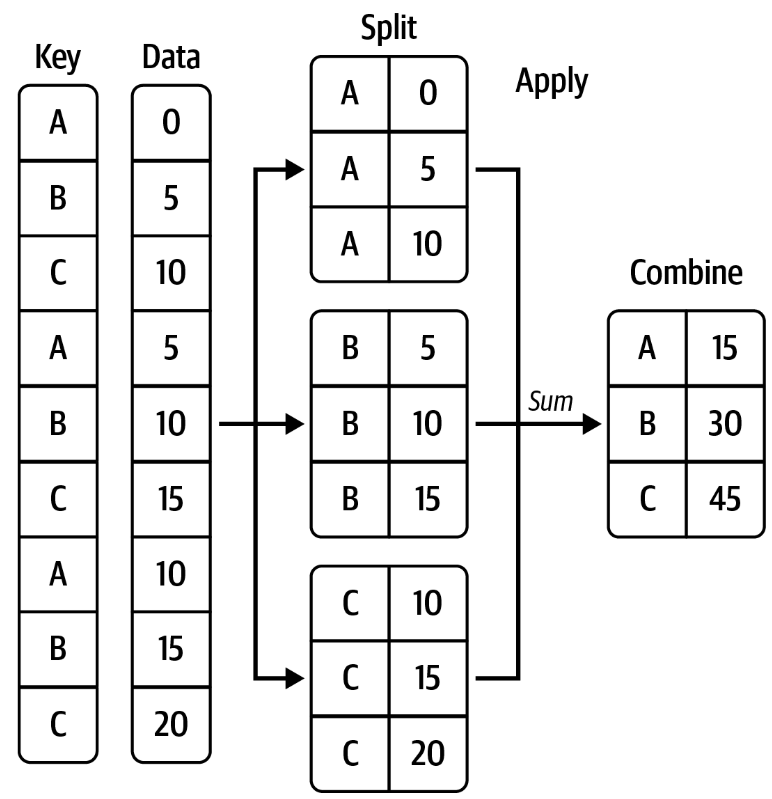

In [74]:
df = pd.DataFrame({"key1": ["a", "a", None, "b", "b", "a", None],
                   "key2": pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                   "data1": np.random.standard_normal(7),
                   "data2": np.random.standard_normal(7)})

df

,key1,key2,data1,data2
0,a,1,1.230431,-0.224924
1,a,2,-0.192528,-2.372124
2,None,1,-1.098854,-1.034821
3,b,2,-1.000635,0.908355
4,b,1,-0.505908,-0.549527
5,a,<NA>,0.621654,0.729262
6,None,1,-0.184173,-1.108099


#### groupby 메서드
- groupby 객체는 그룹 연산을 위해 필요한 모든 정보를 가짐
- groupby 객체는 각 그룹에 어떠한 연산을 적용할 수 있게 해줌

In [75]:
# 데이터를 ke1으로 묶고 각 그룹에서 data1의 평균 구하기
# data1에 대해 groupby 메서드 호출 후 key1 열 넘기기
grouped = df["data1"].groupby(df["key1"])
grouped # grouped 변수는 groupby 객체

In [76]:
# 그룹별 평균 구하기
grouped.mean()

,data1
key1,
a,0.553186
b,-0.753272


In [77]:
# 여러 개의 배열을 리스트로 넘겼을 때
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1       1.230431
      2      -0.192528
b     1      -0.505908
      2      -1.000635
Name: data1, dtype: float64

In [78]:
# 길이만 같다면 배열은 상관 없음
means.unstack()

key2,1,2
key1,,
a,1.230431,-0.192528
b,-0.505908,-1.000635


In [79]:
# 그룹으로 묶을 정보는 같은 DataFrame 안에서 주로 찾음

states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

df["data1"].groupby([states, years]).mean() # 열 이름(문자열, 숫자 혹은 다른 파이썬 객체)을 넘겨 그룹의 색인으로 사용

CA  2005    0.214563
    2006   -1.098854
OH  2005    0.114898
    2006   -0.345041
Name: data1, dtype: float64

In [80]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.553186,-0.622595
b,1.5,-0.753272,0.179414


In [81]:
# 성가신 열 (nuisance columns) -> 불필요한 열
df.groupby("key2").mean(numeric_only=True) # numeric_only=True: 해당 데이터프레임에서 숫자값을 가지는 칼럼에 대해서만 평균값을 계산

,data1,data2
key2,,
1,-0.139626,-0.729343
2,-0.596581,-0.731884


In [82]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1     1.230431 -0.224924
     2    -0.192528 -2.372124
b    1    -0.505908 -0.549527
     2    -1.000635  0.908355

In [83]:
# size 메서드: 그룹의 크기를 담고 있는 Series 반환
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [84]:
# 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외
df.groupby("key1").size()

,0
key1,
a,3
b,2


In [85]:
# 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외
df.groupby("key1", dropna=False).size() #dropna=False 인수를 넘겨 비활성화 가능

,0
key1,
a,3
b,2
NaN,2


In [86]:
df.groupby(["key1", "key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [87]:
# count 함수: 크기 구하는 그룹 함수 (널이 아닌 값의 개수)
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


### 10.1.1 그룹 간 순회하기
- groupby 메서드에서 반환된 객체는 순회(이터레이션, iteration) 지원하며, 그룹 이름과 그에 따른 데이터 묶음을 튜플로 반환
- 색인이 여럿 존재하는 경우에는 튜플의 첫 번째 원소가 색인값
- groupby 메서드는 기본적으로 axis="index" 에 대해 그룹을 만드는데, 다른 축으로 그룹을 만드는 것도 가능

In [88]:
for name, group in df.groupby("key1"):
  print(name)
  print(group)

a
  key1  key2     data1     data2
0    a     1  1.230431 -0.224924
1    a     2 -0.192528 -2.372124
5    a  <NA>  0.621654  0.729262
b
  key1  key2     data1     data2
3    b     2 -1.000635  0.908355
4    b     1 -0.505908 -0.549527


In [89]:
# 색인이 여럿 존재하는 경우에는 튜플의 첫 번째 원소가 색인값
for (k1, k2), group in df.groupby(["key1", "key2"]):
  print(k1, k2)
  print(group)

a 1
  key1  key2     data1     data2
0    a     1  1.230431 -0.224924
a 2
  key1  key2     data1     data2
1    a     2 -0.192528 -2.372124
b 1
  key1  key2     data1     data2
4    b     1 -0.505908 -0.549527
b 2
  key1  key2     data1     data2
3    b     2 -1.000635  0.908355


In [90]:
# 원하는 데이터만 골라내기
pieces = {name: group for name, group in df.groupby("key1")} # 한 줄이면 그룹별 데이터를 딕셔너리형으로 쉽게 바꿔 사용 가능
pieces['b']

,key1,key2,data1,data2
3,b,2,-1.000635,0.908355
4,b,1,-0.505908,-0.549527


In [91]:
# 열이 "key" 또는 "data" 로 시작하는지에 따라 그룹 묶기
gropued = df.groupby({"key1": "key", "key2": "key",
                      "data1": "data", "data2": "data"}, axis="columns")

<ipython-input-91-da406e1c5de1>:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  gropued = df.groupby({"key1": "key", "key2": "key",


In [92]:
for group_key, group_values in grouped:
  print(group_key)
  print(group_values)

a
0    1.230431
1   -0.192528
5    0.621654
Name: data1, dtype: float64
b
3   -1.000635
4   -0.505908
Name: data1, dtype: float64


### 10.1.2 열이나 열의 일부만 선택하기
- 색인으로 얻는 객체는 groupby 메서드에 리스트나 배열을 넘겼을 경우 그룹 묶인 DataFrame 됨
- 단일 값으로 하나의 열 이름만 넘겼다면 그룹 이름으로 묶인 Series가 됨

In [93]:
df.groupby("key1")["data1"] # == df["data1"].groupby(df["key1"])
df.groupby("key1")[["data2"]] # == df[["data2"]].groupby(df["key1"])

In [94]:
# 대용량 데이터셋에서 소수의 열만 집계하기

# data2 열에 대해서만 평균 구하고 DataFrame으로 받기
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1    -0.224924
     2    -2.372124
b    1    -0.549527
     2     0.908355

In [95]:
# 색인으로 얻은 객체 groupby 메서드에 넘기기
s_grouped = df.groupby(["key1", "key2"])["data2"]
s_grouped

In [96]:
s_grouped.mean()

key1  key2
a     1      -0.224924
      2      -2.372124
b     1      -0.549527
      2       0.908355
Name: data2, dtype: float64

### 10.1.3 딕셔너리와 Series에서 그룹화하기


In [97]:
# 배열이 아닌 형태의 그룹 정보
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])

# NA 값 추가하기
people.iloc[2:3, [1, 2]] = np.nan # 2행의 1번, 2번 칼럼

people

,a,b,c,d,e
Joe,-1.406818,2.012474,-0.324752,-2.162296,1.428716
Steve,-0.532971,1.463306,-0.559668,1.335345,-0.363411
Wanda,1.065998,NaN,NaN,0.376531,-0.942483
Jill,-1.886550,1.345213,-0.868912,-0.242229,-0.640458
Trey,2.856452,-0.567210,0.907178,-0.617155,1.348443


In [98]:
# 그룹별로 열의 값 모두 더하기
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e":"red", "f": "orange"} # f 키는 사용하지 않는 그룹 키

In [99]:
# 앞의 딕셔너리를 groupby 메서드에 넘김
by_column = people.groupby(mapping, axis="columns")
by_column.sum() # 값별 합계 구하기

<ipython-input-99-65341fa9a550>:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  by_column = people.groupby(mapping, axis="columns")


,blue,red
Joe,-2.487047,2.034371
Steve,0.775677,0.566924
Wanda,0.376531,0.123515
Jill,-1.111141,-1.181795
Trey,0.290023,3.637686


In [100]:
# Series 그룹화하기
map_series = pd.Series(mapping)
map_series

,0
a,red
b,red
c,blue
d,blue
e,red
f,orange


In [101]:
people.groupby(map_series, axis="columns").count() # 개수 세기

<ipython-input-101-b47edcecb418>:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  people.groupby(map_series, axis="columns").count() # 개수 세기


,blue,red
Joe,2,3
Steve,2,3
Wanda,1,2
Jill,2,3
Trey,2,3


### 10.1.4 함수로 그룹화하기
- 그룹 색인으로 넘긴 함수는 색인값 하나마다 한 번씩 호출
- axis="columns" 사용 시 열의 값 하나마다 한 번씩 호출
> 반환값은 그 그룹의 이름으로 사용
- 내부적으로 모두 배열로 변환되므로 함수와 배열, 딕셔너리 또는 Series를 함께 섞어 사용 가능

In [102]:
# 이름 길이별로 그룹화하기
people.groupby(len).sum() # 이름의 길이가 담긴 배열 대신 len 함수 넘기기

,a,b,c,d,e
3,-1.406818,2.012474,-0.324752,-2.162296,1.428716
4,0.969902,0.778003,0.038266,-0.859384,0.707985
5,0.533027,1.463306,-0.559668,1.711876,-1.305894


In [103]:
key_list = ["one", "one", "one", "two", "two"]

# 함수, 리스트 등 섞어 사용 가능
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,-1.406818,2.012474,-0.324752,-2.162296,1.428716
4,two,-1.886550,-0.567210,-0.868912,-0.617155,-0.640458
5,one,-0.532971,1.463306,-0.559668,0.376531,-0.942483


### 10.1.5 색인 단계로 그룹화하기
- 계층적으로 색인된 데이터셋은 축 색인의 단계 중 하나를 사용헤서 편리하게 집계 가능

In [104]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                     [1, 3, 5, 1, 3]],
                                    names=["city", "tenor"])

hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), columns=columns)
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0      0.852802  1.344079  0.547145  0.060858 -0.200604
1     -0.442378  1.192355 -0.466626  0.112200  0.676756
2     -0.531301  1.954125 -1.159636 -0.338629  0.413934
3      0.989953 -1.755302 -2.130612  0.301254  0.581223

In [105]:
# 색인 단계로 그룹화하는 기능을 사용하려면 level 예약어 사용 (단계 번호, 이름)
hier_df.groupby(level="city", axis="columns").count()

<ipython-input-105-7afc6b76d338>:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hier_df.groupby(level="city", axis="columns").count()


city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 10.2 데이터 집계
- 데이터 집계: 배열로부터 스칼라 값을 만들어내는 모든 데이터 변환 작업

[최적화된 groupby 메서드]
- any, all: 하나 이상의 값 또는 모든 값이 NA 값이 아닌 경우 True 반환
- count: 그룹에서 NA 가 아닌 값의 수 반환
- cummin, cummax: NA가 아닌 값들의 누적 최솟값, 누적 최댓값
- cumsum: NA 가 아닌 값들의 누적 합
- cumprod: NA가 아닌 값들의 누적 곱
- first, last: NA가 아닌 값들 중 첫 번째 값과 마지막 값
- mean: NA가 아닌 값들의 평균
- median: NA가 아닌 값들의 중위값 (산술 중앙값)
- min, max: NA 가 아닌 값들 중 최솟값과 최댓값
- nth: 정렬된 순서에서 위치 n에 나타날 값 반환
- ohlc: 시계열 데이터에서 open-high-low-close 통곗값 계산
- prod: NA가 아닌 값들의 곱
- quantile: 표본 사분위수 계산
- rank: Series.rank 함수처럼 NA가 아닌 값들의 순서
- size: 그룹의 크기를 계산하고 결과를 Series 형태로 반환
- sum: NA가 아닌 값들의 합
- std, var: 편향되지 않은 (n-1을 분모로 하는) 표준편차와 분산

In [106]:
# 직접 고안한 집계 함수와 그룹 객체에 이미 정의된 메서드를 연결해서 사용 가능

df

,key1,key2,data1,data2
0,a,1,1.230431,-0.224924
1,a,2,-0.192528,-2.372124
2,None,1,-1.098854,-1.034821
3,b,2,-1.000635,0.908355
4,b,1,-0.505908,-0.549527
5,a,<NA>,0.621654,0.729262
6,None,1,-0.184173,-1.108099


In [107]:
grouped = df.groupby("key1")

In [108]:
# Series의 nsmallest 메서드: 요청받은 수만큼 데이터에서 가장 작은 값 선택
grouped["data1"].nsmallest(2)

key1   
a     1   -0.192528
      5    0.621654
b     3   -1.000635
      4   -0.505908
Name: data1, dtype: float64

In [109]:
# describe 메서드는 데이터를 집계하지 않아도 작동 이상 없음
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.553186  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0 -0.753272  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.926043  1.230431   3.0 -0.622595  1.588475 -2.372124 -1.298524   
b    -0.629590 -0.505908   2.0  0.179414  1.030878 -0.549527 -0.185057   

                                    
           50%       75%       max  
key1                                
a    -0.224924  0.252169  0.729262  
b     0.179414  0.543884  0.908355  

[2 rows x 24 columns]

### 10.2.1 열에 여러 가지 함수 적용하기


In [110]:
# 팁 데이터셋 불러오기
tips = pd.read_csv(path_ex + 'tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [111]:
# total_bill에서 팁의 비율을 tip_pct 열에 추가
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [112]:
# groupby로 tips를 day와 smoker 별로 묶기
grouped = tips.groupby(["day", "smoker"])

In [113]:
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean") # agg() 메서드는 사용자에게 다중집계작업(multiple aggregation operation)을 간결하게 나타냄

day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [114]:
# 함수 목록이나 함수 이름을 넘기면 함수 이름을 열 이름으로 하는 DataFrame 얻음
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped_pct.agg(["mean", "std", peak_to_peak]) # peak_to_peak: 그룹 내의 각 열의 최댓값에서 최솟값을 뺀 값을 계산하는 함수

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.179740  0.039458      0.094263
     Yes     0.216293  0.077530      0.242219
Sat  No      0.190412  0.058626      0.352192
     Yes     0.179833  0.089496      0.446137
Sun  No      0.193617  0.060302      0.274897
     Yes     0.322021  0.538061      2.382107
Thur No      0.193424  0.056065      0.284273
     Yes     0.198508  0.057170      0.219047

In [115]:
# 이름과 함수가 담긴 튜플의 리스트를 넘기면 각 튜플의 첫 번째 원소가 DataFrame 열의 이름으로 사용됨.
# 두 개의 튜플을 가지는 리스트가 순서대로 매핑
grouped_pct.agg([("average", "mean"), ("stdev", np.std)])

<ipython-input-115-623d8222ce04>:3: FutureWarning: The provided callable <function std at 0x7fa3d4f05620> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_pct.agg([("average", "mean"), ("stdev", np.std)])


average     stdev
day  smoker                    
Fri  No      0.179740  0.039458
     Yes     0.216293  0.077530
Sat  No      0.190412  0.058626
     Yes     0.179833  0.089496
Sun  No      0.193617  0.060302
     Yes     0.322021  0.538061
Thur No      0.193424  0.056065
     Yes     0.198508  0.057170

In [116]:
# DataFrame은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용 가능

# tip_pct와 total_bill 열에 세 가지 통계 계산
functions = ["count", "max", "min"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)
result

tip_pct                     total_bill              
              count       max       min      count    max    min
day  smoker                                                     
Fri  No           4  0.231125  0.136861          4  22.75  12.46
     Yes         15  0.357737  0.115518         15  40.17   5.75
Sat  No          45  0.412409  0.060217         45  48.33   7.25
     Yes         42  0.483092  0.036955         42  50.81   3.07
Sun  No          57  0.338101  0.063204         57  48.17   8.77
     Yes         19  2.452381  0.070274         19  45.35   7.25
Thur No          45  0.362976  0.078704         45  41.19   7.51
     Yes         17  0.317965  0.098918         17  43.11  10.34

In [117]:
result["tip_pct"]

count       max       min
day  smoker                           
Fri  No          4  0.231125  0.136861
     Yes        15  0.357737  0.115518
Sat  No         45  0.412409  0.060217
     Yes        42  0.483092  0.036955
Sun  No         57  0.338101  0.063204
     Yes        19  2.452381  0.070274
Thur No         45  0.362976  0.078704
     Yes        17  0.317965  0.098918

In [118]:
# 열 이름이 담긴 튜플 리스트 넘기기
ftuples = [("Average", "mean"), ("Variance", np.var)]

grouped[["tip_pct", "total_bill"]].agg(ftuples)

<ipython-input-118-b7c308b168d5>:4: FutureWarning: The provided callable <function var at 0x7fa3d4f05760> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  grouped[["tip_pct", "total_bill"]].agg(ftuples)


tip_pct           total_bill            
              Average  Variance    Average    Variance
day  smoker                                           
Fri  No      0.179740  0.001557  18.420000   25.596333
     Yes     0.216293  0.006011  16.813333   82.562438
Sat  No      0.190412  0.003437  19.661778   79.908965
     Yes     0.179833  0.008010  21.276667  101.387535
Sun  No      0.193617  0.003636  20.506667   66.099980
     Yes     0.322021  0.289509  24.120000  109.046044
Thur No      0.193424  0.003143  17.113111   59.625081
     Yes     0.198508  0.003268  19.190588   69.808518

In [119]:
# 열마다 다른 함수 적용하기
# agg 메서드에 열 이름에 대응하는 함수가 들어있는 딕셔너리 넘김
grouped.agg({"tip": np.max, "size": "sum"})

<ipython-input-119-c6de22771c14>:3: FutureWarning: The provided callable <function max at 0x7fa3d4f04ae0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped.agg({"tip": np.max, "size": "sum"})


tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [120]:
grouped.agg({"tip_pct": ["min", "max", "mean", "std"], "size": "sum"})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.136861  0.231125  0.179740  0.039458    9
     Yes     0.115518  0.357737  0.216293  0.077530   31
Sat  No      0.060217  0.412409  0.190412  0.058626  115
     Yes     0.036955  0.483092  0.179833  0.089496  104
Sun  No      0.063204  0.338101  0.193617  0.060302  167
     Yes     0.070274  2.452381  0.322021  0.538061   49
Thur No      0.078704  0.362976  0.193424  0.056065  112
     Yes     0.098918  0.317965  0.198508  0.057170   40

### 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
- groupby 메서드에 as_index=False 를 넘겨 색인 작업 비활성화

In [121]:
grouped = tips.groupby(["day", "smoker"], as_index=False)
grouped.mean(numeric_only=True)

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.179740
1,Fri,Yes,16.813333,2.714000,2.066667,0.216293
2,Sat,No,19.661778,3.102889,2.555556,0.190412
3,Sat,Yes,21.276667,2.875476,2.476190,0.179833
4,Sun,No,20.506667,3.167895,2.929825,0.193617
5,Sun,Yes,24.120000,3.516842,2.578947,0.322021
6,Thur,No,17.113111,2.673778,2.488889,0.193424
7,Thur,Yes,19.190588,3.030000,2.352941,0.198508


## 10.3 apply 메서드: 일반적인 분리-적용-병합
- apply 메서드는 groupby 메서드의 가장 일반적인 메서드
- apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조직에 일괄적으로 적용한 후 이를 다시 합침


In [122]:
# 팁 데이터셋에서 그룹별 상위 다섯 개의 tip_pct 값 고르기

# 특정 열에서 가장 큰 값을 갖는 행 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
  return df.sort_values(column, ascending=False)[:n]

# 함수 호출
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
232,11.61,3.39,No,Sat,Dinner,2,0.412409
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973


#### 1. tips DataFrame이 smoker 값에 따라 여러 그룹으로 나뉨
#### 2. 나눠진 DataFrame의 각 부분에 top 함수 적용
#### 3. pandas.concat을 이용해 하나로 합쳐진 다음 그룹 이름 붙음
#### 결과는 계층적 색인을 가지게 되고 내부 색인은 원본 DataFrame의 색인값 가짐


In [123]:
# 흡연자 그룹에 대해 top 함수 apply
tips.groupby("smoker").apply(top)

<ipython-input-123-0870e0890616>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby("smoker").apply(top)


total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.412409
       149        7.51  2.00     No  Thur   Lunch     2  0.362976
       51        10.29  2.60     No   Sun  Dinner     2  0.338101
       185       20.69  5.00     No   Sun  Dinner     5  0.318674
       88        24.71  5.85     No  Thur   Lunch     2  0.310180
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  2.452381
       178        9.60  4.00    Yes   Sun  Dinner     2  0.714286
       67         3.07  1.00    Yes   Sat  Dinner     1  0.483092
       183       23.17  6.50    Yes   Sun  Dinner     4  0.389922
       109       14.31  4.00    Yes   Sat  Dinner     2  0.387973

In [124]:
# apply 메서드에 넘길 함수가 추가적인 인수나 예약어 받을 경우
# 함수 이름 뒤에 붙여 넘겨주면 됨
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

<ipython-input-124-f181e3d368c8>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.166667
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.228833
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.115821
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.138160
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.133465
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.245038
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.083632
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.131199

#### describe 메서드
def f(group):
  return group.describe()

group.apply(f)

In [126]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.192237,0.057665,0.060217,0.158622,0.184308,0.227015,0.412409
Yes,93.0,0.218176,0.254295,0.036955,0.119534,0.181818,0.242326,2.452381


In [127]:
result.unstack("smoker")

smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.192237
       Yes         0.218176
std    No          0.057665
       Yes         0.254295
min    No          0.060217
       Yes         0.036955
25%    No          0.158622
       Yes         0.119534
50%    No          0.184308
       Yes         0.181818
75%    No          0.227015
       Yes         0.242326
max    No          0.412409
       Yes         2.452381
dtype: float64

### 10.3.1 그룹 키 생략하기
- groupby 메서드에 group_keys=False 전달하면 각 조각에 대한 색인과 그룹 키가 계층적 색인으로 사용됨을 방지할 수 있음

In [128]:
tips.groupby("smoker", group_keys=False).apply(top)

<ipython-input-128-de6df242f7c0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby("smoker", group_keys=False).apply(top)


,total_bill,tip,smoker,day,time,size,tip_pct
232,11.61,3.39,No,Sat,Dinner,2,0.412409
149,7.51,2.00,No,Thur,Lunch,2,0.362976
51,10.29,2.60,No,Sun,Dinner,2,0.338101
185,20.69,5.00,No,Sun,Dinner,5,0.318674
88,24.71,5.85,No,Thur,Lunch,2,0.310180
172,7.25,5.15,Yes,Sun,Dinner,2,2.452381
178,9.60,4.00,Yes,Sun,Dinner,2,0.714286
67,3.07,1.00,Yes,Sat,Dinner,1,0.483092
183,23.17,6.50,Yes,Sun,Dinner,4,0.389922
109,14.31,4.00,Yes,Sat,Dinner,2,0.387973


#### 10.3.2 사분위수 분석과 버킷 분석
- pd.cut 또는 pd.qcut 함수들을 groupby와 조합하면 데이터셋에 대한 버킷분석이나 사분위수 분석을 쉽게 수행 가능

In [129]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
                      "data2": np.random.standard_normal(1000)})

frame.head()

,data1,data2
0,-0.608706,0.152043
1,0.155756,-1.064838
2,0.209102,1.116481
3,-0.693526,1.538487
4,0.870059,0.571588


In [130]:
quartiles = pd.cut(frame["data1"], 4)
quartiles.head()

,data1
0,"(-1.535, -0.00583]"
1,"(-0.00583, 1.524]"
2,"(-0.00583, 1.524]"
3,"(-1.535, -0.00583]"
4,"(-0.00583, 1.524]"


In [132]:
def get_stats(group):
  return pd.DataFrame(
      {"min": group.min(), "max": group.max(),
       "count": group.count(), "mean": group.mean()})

grouped = frame.groupby(quartiles)

grouped.apply(get_stats)

<ipython-input-132-e0466757db5c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = frame.groupby(quartiles)


min       max  count      mean
data1                                                        
(-3.071, -1.535]   data1 -3.065168 -1.544395     53 -2.077111
                   data2 -2.367066  1.394451     53 -0.031782
(-1.535, -0.00583] data1 -1.535488 -0.007170    449 -0.640949
                   data2 -2.847616  3.461606    449 -0.045665
(-0.00583, 1.524]  data1 -0.004339  1.519707    432  0.634864
                   data2 -3.181797  3.055329    432 -0.009954
(1.524, 3.054]     data1  1.523950  3.053512     66  1.921169
                   data2 -2.568250  1.763287     66  0.022508

In [133]:
# 위의 get_stats 함수를 더 간단히 하는 방법
grouped.agg(["min", "max", "count", "mean"])

data1                               data2            \
                         min       max count      mean       min       max   
data1                                                                        
(-3.071, -1.535]   -3.065168 -1.544395    53 -2.077111 -2.367066  1.394451   
(-1.535, -0.00583] -1.535488 -0.007170   449 -0.640949 -2.847616  3.461606   
(-0.00583, 1.524]  -0.004339  1.519707   432  0.634864 -3.181797  3.055329   
(1.524, 3.054]      1.523950  3.053512    66  1.921169 -2.568250  1.763287   

                                    
                   count      mean  
data1                               
(-3.071, -1.535]      53 -0.031782  
(-1.535, -0.00583]   449 -0.045665  
(-0.00583, 1.524]    432 -0.009954  
(1.524, 3.054]        66  0.022508

In [134]:
# qcut: 표본 사분위수에 기반한 버킷 계산
quartiles_samp = pd.qcut(frame["data1"], 4, labels=False) # labels=False를 전달해 간격 대신 사분위수 색인 구함
quartiles_samp.head()

,data1
0,1
1,2
2,2
3,0
4,3


In [135]:
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

min       max  count      mean
data1                                           
0     data1 -3.065168 -0.670533    250 -1.265489
      data2 -2.724742  3.461606    250 -0.079028
1     data1 -0.647028 -0.013052    250 -0.325942
      data2 -2.847616  3.087072    250 -0.017905
2     data1 -0.007985  0.681043    250  0.324277
      data2 -3.181797  2.889410    250  0.054964
3     data1  0.681992  3.053512    250  1.279897
      data2 -3.100312  3.055329    250 -0.058042

### 10.3.3 그룹별 값으로 결측치 채우기
- dropna: 결측치 걸러내기
- fillna: 결측치 채우기

In [136]:
s = pd.Series(np.random.standard_normal(6))

s[::2] = np.nan # 모든 행렬에서 2행씩
s

,0
0,NaN
1,0.097435
2,NaN
3,-1.296516
4,NaN
5,-1.154922


In [138]:
s1 = pd.DataFrame(np.random.standard_normal((6,3)))

s1[::2] = np.nan # 모든 행렬에서 2행씩
s1

,0,1,2
0,NaN,NaN,NaN
1,0.248918,0.406785,-0.017330
2,NaN,NaN,NaN
3,-0.707856,0.493866,0.040119
4,NaN,NaN,NaN
5,-0.952931,-0.293436,-0.788736


In [139]:
s.fillna(s.mean())

,0
0,-0.784668
1,0.097435
2,-0.784668
3,-1.296516
4,-0.784668
5,-1.154922


In [141]:
# 그룹별로 채워 넣고 싶은 값 다를 경우
# 데이터를 그룹으로 나누고 apply 함수를 사용해서 각 그룹에 대해 fillna 적용

# 미국 동부와 서부
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]

group_key = ["East", "East", "East", "East",
             "West", "West", "West", "West"]

data = pd.Series(np.random.standard_normal(8), index=states)

data

,0
Ohio,-1.623764
New York,0.496979
Vermont,-0.556698
Florida,1.319059
Oregon,-0.465348
Nevada,1.151565
California,-0.973069
Idaho,-1.076265


In [142]:
# data 일부 값 결측치로 만들기
data[["Vermont", "Nevada", "Idaho"]] = np.nan

data

,0
Ohio,-1.623764
New York,0.496979
Vermont,NaN
Florida,1.319059
Oregon,-0.465348
Nevada,NaN
California,-0.973069
Idaho,NaN


In [143]:
data.groupby(group_key).size()

,0
East,4
West,4


In [144]:
data.groupby(group_key).count()

,0
East,3
West,2


In [145]:
data.groupby(group_key).mean()

,0
East,0.064091
West,-0.719209


In [147]:
# 누락된 값 평균값으로 채우는 함수
def fill_mean(group):
  return group.fillna(group.mean())

data.groupby(group_key).apply(fill_mean)

East  Ohio         -1.623764
      New York      0.496979
      Vermont       0.064091
      Florida       1.319059
West  Oregon       -0.465348
      Nevada       -0.719209
      California   -0.973069
      Idaho        -0.719209
dtype: float64

In [149]:
# 그룹별로 미리 정의된 다른 값 채워넣기
# 각 그룹이 내부적으로 가지고 있는 name 속성 활용
fill_values = {"East": 0.5, "West": -1}

# 결측값에 특정 값 채우는 함수 정의
def fill_func(group):
  return group.fillna(fill_values[group.name])

data.groupby(group_key).apply(fill_func)

East  Ohio         -1.623764
      New York      0.496979
      Vermont       0.500000
      Florida       1.319059
West  Oregon       -0.465348
      Nevada       -1.000000
      California   -0.973069
      Idaho        -1.000000
dtype: float64

### 10.3.4 랜덤 표본과 순열
- Series의 sample 메서드 사용한 랜덤 표본

In [151]:
# 트럼프 카드 덱 만들기
suits = ["H", "S", "C", "D"] # 하트, 스페이드, 클럽, 다이아몬드
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ["A"] + list(range(2, 11)) + ["J", "K", "Q"]
cards = []
for suit in suits:
  cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

deck.head(13)

,0
AH,1
2H,2
3H,3
4H,4
5H,5
6H,6
7H,7
8H,8
9H,9
10H,10


In [152]:
# 다섯 장의 카드 뽑기
def draw(deck, n=5):
  return deck.sample(n) # sample 메서드로 랜덤 추출

draw(deck)

,0
9S,9
8S,8
JD,10
3C,3
3H,3


In [153]:
# 각 모양별로 두 장의 카드 무작위로 뽑기
def get_suit(card):
  # 마지막 글자는 모양 표시
  return card[-1]

deck.groupby(get_suit).apply(draw, n=2)

C  8C      8
   9C      9
D  JD     10
   10D    10
H  2H      2
   3H      3
S  7S      7
   9S      9
dtype: int64

In [154]:
# group_keys=False : 다른 모양의 색인 제외하고 선택된 카드만 남김
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

,0
AC,1
QC,10
JD,10
7D,7
2H,2
5H,5
JS,10
10S,10


### 10.3.5 그룹 가중평균과 상관관계

In [156]:
# 그룹 키와 값, 특정 가중치를 갖는 데이터셋
df = pd.DataFrame({"category": ["a", "a", "a", "a",
                                "b", "b", "b", "b"],
                   "data": np.random.standard_normal(8),
                   "weights": np.random.uniform(size=8)
                   })

df

,category,data,weights
0,a,-0.713882,0.599334
1,a,0.648357,0.378114
2,a,0.017918,0.389297
3,a,-1.035028,0.751560
4,b,1.626770,0.042904
5,b,0.069402,0.966768
6,b,-0.051923,0.282866
7,b,0.711653,0.056199


In [157]:
# category별 그룹 가중평균 산출
grouped = df.groupby("category")

def get_wavg(group): # weight average: 가중평균
  return np.average(group["data"], weights=group["weights"])

grouped.apply(get_wavg)

<ipython-input-157-c8a1cae595f3>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_wavg)


,0
category,
a,-0.450176
b,0.120258


In [158]:
# 야후 파이낸스 주식, S&P 500 지수 종가 데이터셋
close_px = pd.read_csv(path_ex + 'stock_px.csv', parse_dates=True,
                       index_col=0) # parse_dates 는 날짜형식으로 되어있는 데이터를 datetime형식으로 바꿔주는 함수
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [159]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [160]:
# 퍼센트 변화율로 일일 수익률 계산하고 연간 SPX 지수와의 상관관계 보기
def spx_corr(group):
  return group.corrwith(group["SPX"])

# pct_change 함수를 이용해 close_px 퍼센트 변화율 계산
rets = close_px.pct_change().dropna()

# 각 datatime에서 연도 속성만 반환하는 함수를 통해 연도별 퍼센트 변화율 구하기
# 함수 정의
def get_year(x):
  return x.year

by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [162]:
# 두 열 간의 상관관계 계산하기

# 애플과 마이크로소프트 연관 상관관계 계산하는 함수 정의
def corr_appl_msft(group):
  return group['AAPL'].corr(group['MSFT'])

by_year.apply(corr_appl_msft)

,0
2003,0.480868
2004,0.259024
2005,0.300093
2006,0.161735
2007,0.417738
2008,0.611901
2009,0.432738
2010,0.571946
2011,0.581987


### 10.3.6 그룹별 선형 회귀
- statsmodels 라이브러리: Python 프로그래밍 언어를 위한 통계적 모델링, 통계 테스트, 데이터 탐색 및 시각화를 지원하는 라이브러리

In [163]:
# statsmodels 사용하여 regress 함수 작성하고 각 데이터 묶음마다 최소제곱법(OLS)으로 회귀 수행
import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
  Y = data[yvar]
  X = data[xvars]
  X["Intercet"] = 1
  result = sm.OLS(Y, X).fit()
  return result.params

In [165]:
# SPX 수익률에 대한 애플 주식의 연관 선형 회귀 구하기
by_year.apply(regress, yvar='AAPL', xvars=["SPX"])

,SPX,Intercet
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 10.4 그룹 변환과 매핑되지 않은 groupby
- transform 메서드

[transform 메서드 제약 사항]
- 그룹 모양대로 브로드캐스팅할 스칼라 값 생성
- 입력 그룹과 동일한 모양의 객체 생성
- 입력 변경 불가

In [166]:
df = pd.DataFrame({"key": ["a", "b", "c"] * 4,
                   "value": np.arange(12.)})

df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [168]:
# 키별 그룹 평균
g = df.groupby("key")["value"]
g.mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [169]:
# transform으로 단일 그룹의 평균 계산
# transform 함수: 변환을 거친 이후에 본래의 데이터와 같은 사이즈의 형태를 취함

# 그룹의 평균 계산 함수 정의
def get_mean(group):
  return group.mean()

g.transform(get_mean)

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [170]:
# 내장 집계 함수의 경우 문자열 별칭 전달 가능
g.transform("mean")

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [171]:
# 각 그룹에 2 곱하는 함수 정의
def times_two(group):
  return group * 2

g.transform(times_two)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [172]:
# 그룹의 순위 내림차순 정렬하는 함수 정의
def get_ranks(group):
  return group.rank(ascending=False)

g.transform(get_ranks)

,value
0,4.0
1,4.0
2,4.0
3,3.0
4,3.0
5,3.0
6,2.0
7,2.0
8,2.0
9,1.0


In [173]:
# 단순 집계로 구성된 그룹 변환 함수 정의
def normalize(x):
  return (x - x.mean()) / x.std()

In [174]:
g.transform(normalize)

,value
0,-1.161895
1,-1.161895
2,-1.161895
3,-0.387298
4,-0.387298
5,-0.387298
6,0.387298
7,0.387298
8,0.387298
9,1.161895


In [175]:
g.apply(normalize)

key    
a    0    -1.161895
     3    -0.387298
     6     0.387298
     9     1.161895
b    1    -1.161895
     4    -0.387298
     7     0.387298
     10    1.161895
c    2    -1.161895
     5    -0.387298
     8     0.387298
     11    1.161895
Name: value, dtype: float64

In [176]:
# 내장 집계 함수는 일반 apply 함수보다 빠름
# transform과 함께 사용 시 취할 수 있는 빠른 경로 존재
# 래핑되지 않은 그룹 연산 수행
g.transform('mean')

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [177]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

normalized

,value
0,-1.161895
1,-1.161895
2,-1.161895
3,-0.387298
4,-0.387298
5,-0.387298
6,0.387298
7,0.387298
8,0.387298
9,1.161895


## 10.5 피벗 테이블과 교차표
- 피벗 테이블: 데이터를 하나 이상의 키로 수집해서 어떤 키는 행에, 어떤 키는 열에 나열하여 데이터 정렬
- 판다스에서 피벗 테이블은 groupby 기능을 사용해 계층적 색인을 활용한 재구성 연산 가능
- pandas.pivot_table 메서드 (또는 DataFrame의 pivot_table)
- pivot_table은 마진(부분합)을 추가하는 기능 제공

[pivot_table 옵션]
- values: 집계하려는 열 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 열 집계
- index: 만들어지는 피벗테이블의 행을 그룹으로 묶을 열 이름이나 그룹 키
- columns: 만들어지는 피벗테이블의 열을 그룹으로 묶을 열 이름이나 그룹 키
- aggfunc: 집계함수나 함수 리스트, 기본값으로 mean 사용. groupby 컨텍스트 안에서 유효한 어떤 함수라도 가능
- fill_value: 결측값 대체값으로 채워넣기
- dropna: True 인 경우 모든 항목이 NA 인 열 미포함
- margins: 부분합이나 총합을 담기 위한 행열을 추가할지 여부. 기본값은 False
- margins_name: margins=True 넘겼을 때 사용할 마진 행/열의 이름. 기본값은 All
- observed: 범주형 그룹 키를 사용할 때 True를 넘기면 모든 범줏값이 아니라 관찰된 범줏값만 보여줌.

[교차표]
- 교차표(crosstab): 그룹 빈도를 계산하는 특수한 피벗 테이블
- pandas.crosstab 함수가 pivot_table 메서드보다 더 간편
- crosstab 함수의 처음 두 인수는 배열이나 Series, 혹은 배열의 리스트가 될 수 있음

In [179]:
# 팁 데이터셋으로 요일과 흡연자 그룹의 평균 구하기
tips.pivot_table(index=["day", "smoker"],
                 values=["size", "tip", "tip_pct", "total_bill"])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.179740   18.420000
     Yes     2.066667  2.714000  0.216293   16.813333
Sat  No      2.555556  3.102889  0.190412   19.661778
     Yes     2.476190  2.875476  0.179833   21.276667
Sun  No      2.929825  3.167895  0.193617   20.506667
     Yes     2.578947  3.516842  0.322021   24.120000
Thur No      2.488889  2.673778  0.193424   17.113111
     Yes     2.352941  3.030000  0.198508   19.190588

In [182]:
# pivot_table 사용하지 않고 위와 동일한 값을 구하는 방법
grouped = tips.groupby(["day", "smoker"])

group_mean = grouped[["size", "tip", "tip_pct", "total_bill"]].agg("mean")
group_mean

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.179740   18.420000
     Yes     2.066667  2.714000  0.216293   16.813333
Sat  No      2.555556  3.102889  0.190412   19.661778
     Yes     2.476190  2.875476  0.179833   21.276667
Sun  No      2.929825  3.167895  0.193617   20.506667
     Yes     2.578947  3.516842  0.322021   24.120000
Thur No      2.488889  2.673778  0.193424   17.113111
     Yes     2.352941  3.030000  0.198508   19.190588

In [183]:
# tip_pct와 size에 대해서만 집계하고 날짜별로 그룹화
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.162612  0.202545
       Sat   2.555556  2.476190  0.190412  0.179833
       Sun   2.929825  2.578947  0.193617  0.322021
       Thur  2.000000       NaN  0.190114       NaN
Lunch  Fri   3.000000  1.833333  0.231125  0.236915
       Thur  2.500000  2.352941  0.193499  0.198508

In [184]:
# DataFrame에 margins=True 옵션 > 부분합 추가
# 행과 열에 "All" 추가 및 단일 줄의 그룹 통계 얻음
# All 열: 흡연자 + 비흡연자
# All 행: time + day

tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.162612  0.202545  0.192562
       Sat   2.555556  2.476190  2.517241  0.190412  0.179833  0.185305
       Sun   2.929825  2.578947  2.842105  0.193617  0.322021  0.225718
       Thur  2.000000       NaN  2.000000  0.190114       NaN  0.190114
Lunch  Fri   3.000000  1.833333  2.000000  0.231125  0.236915  0.236088
       Thur  2.500000  2.352941  2.459016  0.193499  0.198508  0.194895
All          2.668874  2.408602  2.569672  0.192237  0.218176  0.202123

In [185]:
# mean 외 다른 집계 함수 사용 시에는 aggfunc 키워드 인수
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], aggfunc=len, margins=True)
# len null 값 제외하지 않음

size            tip_pct           
smoker          No   Yes  All      No   Yes  All
time   day                                      
Dinner Fri     3.0   9.0   12     3.0   9.0   12
       Sat    45.0  42.0   87    45.0  42.0   87
       Sun    57.0  19.0   76    57.0  19.0   76
       Thur    1.0   NaN    1     1.0   NaN    1
Lunch  Fri     1.0   6.0    7     1.0   6.0    7
       Thur   44.0  17.0   61    44.0  17.0   61
All          151.0  93.0  244   151.0  93.0  244

In [187]:
# fill_value: 결측값 채움
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct", fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.160000  0.000000  0.000000
            Yes     0.000000  0.483092  0.000000  0.000000
       2    No      0.162612  0.198319  0.206535  0.190114
            Yes     0.211180  0.178877  0.400522  0.000000
       3    No      0.000000  0.183870  0.182962  0.000000
            Yes     0.000000  0.176599  0.183278  0.000000
       4    No      0.000000  0.177734  0.175289  0.000000
            Yes     0.133465  0.147074  0.254373  0.000000
       5    No      0.000000  0.000000  0.263344  0.000000
            Yes     0.000000  0.119284  0.070274  0.000000
       6    No      0.000000  0.000000  0.115821  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.222087
            Yes     0.288288  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.201503
            Yes     0.226641  0.000000  0.000000  0.191197
       3    No      0.231125  0.000000  0.000000  0.092162
            Yes     0.000000  0.000000  0.000000  0.257941
       4    No      0.000000  0.000000  0.000000  0.161573
            Yes     0.000000  0.000000  0.000000  0.186592
       5    No      0.000000  0.000000  0.000000  0.138160
       6    No      0.000000  0.000000  0.000000  0.211191

In [188]:
# 교차표
from io import StringIO

# 국적과 오른손/왼손잡이
data = """Sample  Nationality Handedness
1 USA Right-handed
2 Japan Left-handed
3 USA Right-handed
4 Japan Right-handed
5 Japan Left-handed
6 Japan Right-handed
7 USA Right-handed
8 USA Left-handed
9 Japan Right-handed
10 USA Right-handed"""

data = pd.read_table(StringIO(data), sep='\s+')
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [191]:
# 국적과 손잡이로 데이터 요약 (pivot_table)
data.pivot_table(index="Nationality", columns="Handedness", aggfunc="count", margins=True)

Sample                 
Handedness  Left-handed Right-handed All
Nationality                             
Japan                 2            3   5
USA                   1            4   5
All                   3            7  10

In [192]:
# 국적과 손잡이로 데이터 요약(crosstab)
# pd.crosstab 함수가 pivot_table 메서드보다 더 간단
pd.crosstab(data["Nationality"], data["Handedness"], margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [193]:
# 팁 데이터셋으로 교차표 구하기
pd.crosstab([tips["time"], tips["day"]], tips["smoker"], margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244